# Tutorial 2: Regresión logística aplicada a la clasificación de datos textuales

## 1. Tarea: análisis de sentimientos

La tarea consiste en clasificar reseñas de peliculas o series, en inglés, en dos categorías: "positiva" y "negativa"

Para entrenar y evaluar modelos de clasificación, tenemos a nuestra disposición el dataset IMDB con 50,000 ejemplos.

## 2. Dataset

In [1]:
import pandas as pd

df = pd.read_csv("datos/imdb.csv")

In [2]:
df.shape

(50000, 2)

In [3]:
df.head(5)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df['review'][1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [5]:
df['sentiment'][1]

'positive'

In [6]:
df['review'][3]

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

In [7]:
df['sentiment'][3]

'negative'

In [8]:
from pandasql import sqldf

q="""SELECT sentiment, count(*) FROM df GROUP BY sentiment ORDER BY count(*) DESC;"""
result=sqldf(q)
result

,sentiment,count(*)
0,positive,25000
1,negative,25000


In [9]:
q="""SELECT * FROM df WHERE sentiment = "positive";"""
df_positive=sqldf(q)

df_positive = df_positive.sample(n=1000)

q="""SELECT * FROM df WHERE sentiment = "negative";"""
df_negative=sqldf(q)

df_negative = df_negative.sample(n=1000)

In [10]:
df = pd.concat([df_positive, df_negative], ignore_index=True)
df.shape

(2000, 2)

In [11]:
df

,review,sentiment
0,"I am embarrassed to say that I missed ""The Mot...",positive
1,I always thought my father had a second life a...,positive
2,So I turned on the TV today at 1:00 PM on a Su...,positive
3,John Leguizamo's one man shows are hit or miss...,positive
4,This movie was excellent. A sad truth to how c...,positive
5,And a hard spot somewhere else. I haven't seen...,positive
6,This is a phenomenal movie. Truly one of the b...,positive
7,"Sergio Martino is a great director, who has co...",positive
8,One of my favorite scenes is at the beginning ...,positive
9,Like a lot of stars of the big screen as their...,positive


## 3. Preprocesamientos: extraer las características del texto 

El algoritmo de regresión logística (y más generalmente, los algoritmos de aprendizaje supervisado) necesita un conjunto de características (*features*) para describir un dato de entrada.

En el caso de la clasificación de textos, aunque no es la única opción, utilizamos comúnmente las **palabras** como características.

In [ ]:
#!pip install -U spacy

#!python -m spacy download en

In [12]:
import spacy

nlp = spacy.load("en")

In [33]:
df['review'][10]

'Imaginary Heroes, the remarkable work of the then 24 year-old Dan Harris, is tag-lined "People are never who they seem to be". Perhaps this is wisely chosen as a stratagem of marketing; yet, I rented this movie in spite of the tag-line, rather than because of it. And, I\'m glad I did. I found the move an insightful examination of tragedy. I personally found it to be a movie about coping with dreams: particularly those which are lost. In the case of one son, "loss" requires deep examination of what he had, and didn\'t have, in his life. Yet, the central tragedy of the movie, while posing enticing questions in its own right, acts primarily as the backdrop against which different coping styles are set into relief. I believe the film inquires into an important question: how do we cope with our dreams, particularly where heroes become imaginary?'

In [34]:
doc = nlp(df['review'][10])

In [35]:
for token in doc:
    print(token.text, end=" | ")

Imaginary | Heroes | , | the | remarkable | work | of | the | then | 24 | year | - | old | Dan | Harris | , | is | tag | - | lined | " | People | are | never | who | they | seem | to | be | " | . | Perhaps | this | is | wisely | chosen | as | a | stratagem | of | marketing | ; | yet | , | I | rented | this | movie | in | spite | of | the | tag | - | line | , | rather | than | because | of | it | . | And | , | I | 'm | glad | I | did | . | I | found | the | move | an | insightful | examination | of | tragedy | . | I | personally | found | it | to | be | a | movie | about | coping | with | dreams | : | particularly | those | which | are | lost | . | In | the | case | of | one | son | , | " | loss | " | requires | deep | examination | of | what | he | had | , | and | did | n't | have | , | in | his | life | . | Yet | , | the | central | tragedy | of | the | movie | , | while | posing | enticing | questions | in | its | own | right | , | acts | primarily | as | the | backdrop | against | w

In [36]:
for token in doc:
    print(token.lemma_, end=" | ")

Imaginary | Heroes | , | the | remarkable | work | of | the | then | 24 | year | - | old | Dan | Harris | , | be | tag | - | line | " | People | be | never | who | -PRON- | seem | to | be | " | . | perhaps | this | be | wisely | choose | as | a | stratagem | of | marketing | ; | yet | , | -PRON- | rent | this | movie | in | spite | of | the | tag | - | line | , | rather | than | because | of | -PRON- | . | and | , | -PRON- | be | glad | -PRON- | do | . | -PRON- | find | the | move | an | insightful | examination | of | tragedy | . | -PRON- | personally | find | -PRON- | to | be | a | movie | about | cope | with | dream | : | particularly | those | which | be | lose | . | in | the | case | of | one | son | , | " | loss | " | require | deep | examination | of | what | -PRON- | have | , | and | do | not | have | , | in | -PRON- | life | . | yet | , | the | central | tragedy | of | the | movie | , | while | pose | enticing | question | in | -PRON- | own | right | , | act | primarily | as |

In [37]:
for token in doc:
    print(token.pos_, end=" | ")

PROPN | PROPN | PUNCT | DET | ADJ | NOUN | ADP | DET | ADV | NUM | NOUN | PUNCT | ADJ | PROPN | PROPN | PUNCT | AUX | NOUN | PUNCT | VERB | PUNCT | NOUN | AUX | ADV | PRON | PRON | VERB | PART | AUX | PUNCT | PUNCT | ADV | DET | AUX | ADV | VERB | SCONJ | DET | NOUN | ADP | NOUN | PUNCT | CCONJ | PUNCT | PRON | VERB | DET | NOUN | ADP | NOUN | ADP | DET | NOUN | PUNCT | NOUN | PUNCT | ADV | SCONJ | SCONJ | ADP | PRON | PUNCT | CCONJ | PUNCT | PRON | AUX | ADJ | PRON | AUX | PUNCT | PRON | VERB | DET | NOUN | DET | ADJ | NOUN | ADP | NOUN | PUNCT | PRON | ADV | VERB | PRON | PART | AUX | DET | NOUN | ADP | VERB | ADP | NOUN | PUNCT | ADV | DET | DET | AUX | VERB | PUNCT | ADP | DET | NOUN | ADP | NUM | NOUN | PUNCT | PUNCT | NOUN | PUNCT | VERB | ADJ | NOUN | ADP | PRON | PRON | AUX | PUNCT | CCONJ | AUX | PART | AUX | PUNCT | ADP | DET | NOUN | PUNCT | ADV | PUNCT | DET | ADJ | NOUN | ADP | DET | NOUN | PUNCT | SCONJ | VERB | ADJ | NOUN | ADP | DET | ADJ | NOUN | PUNCT | VERB | ADV | S

In [38]:
for token in doc.ents:
    print(token.text, end=" | ")

Imaginary Heroes | 24 year-old | Dan Harris | one | 

In [39]:
for token in doc.ents:
    print(token.label_, end=" | ")

PERSON | DATE | PERSON | CARDINAL | 

## 3. Enfoque 1: Transformar los textos en vectores con *bag-of-words*

### 3.1 Modelo Bag-of-words

Una vez seleccionado nuestro conjunto de características (por ejemplo, todos los sustantivos y los adjetivos), necesitamos una manera de representar un texto como un vector de valores numéricos.

La manera la más clásica de representar un texto como un vector es el modelo __bag-of-words__. 

Consideremos los dos textos siguientes:

**T1**: <code>El gato juega con el perro</code>


**T2**: <code>El perro duerme</code>

El conjunto de características (o vocabulario) es: <code>['gato', 'jugar', 'dormir', 'perro']</code>

Se podría representar los textos por:

**T1**: <code>[1, 1, 0, 1]</code>

**T2**: <code>[0, 0, 1, 1]</code>

### 3.2 Limitaciones

- Ignora las **relaciones sintácticas** entre las palabras ("el orden") 
- Ignora las **relaciones semánticas** entre palabras ("los sinónimos")
- Ignora el **nivel pragmático** del lenguaje: ciertas palabras son naturalmente más frecuentes que otras. ("Lo que es poco frecuente, es más importante/relevante") 


- matrices de alta dimensiones y **_sparse_** (muchos valores 0)

### 3.3 Implementación del modelo Bag of words

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

In [41]:
def feature_extraction(text):
    
    mytokens = nlp(text)

    #Guardamos las palabras como características si corresponden a ciertas categorias gramaticales
    mytokens = [ word for word in mytokens if word.pos_ in ["NOUN", "ADJ", "VERB"] ]
    
    #Transformamos las palabras en minusculas
    mytokens = [ word.lemma_.lower().strip() for word in mytokens ]

    # return preprocessed list of tokens
    return mytokens

In [42]:
bow_vector = CountVectorizer(tokenizer = feature_extraction, min_df=0., max_df=1.0)
bow_vector

CountVectorizer(min_df=0.0,
                tokenizer=<function feature_extraction at 0x7f08b0199b90>)

In [43]:
docs = ["You can catch more flies with honey than you can with vinegar.",
        "You can lead a horse to water, but you can't make him drink.",
       "You can do it.",
       "You can see a lot of stars tonight."]

In [44]:
from pandas import DataFrame

X = bow_vector.fit_transform(docs)

print(DataFrame(X.A, columns=bow_vector.get_feature_names()).to_string())

   can  catch  drink  fly  honey  horse  lead  lot  make  more  see  star  tonight  vinegar  water
0    2      1      0    1      1      0     0    0     0     1    0     0        0        1      0
1    2      0      1    0      0      1     1    0     1     0    0     0        0        0      1
2    1      0      0    0      0      0     0    0     0     0    0     0        0        0      0
3    1      0      0    0      0      0     0    1     0     0    1     1        1        0      0


### 3.4 Entrenamiento de un modelo Regresión Logística

In [45]:
from sklearn.model_selection import train_test_split

X = df['review'] 
ylabels = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.5)

In [46]:
X_train.shape

(1000,)

In [47]:
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

model_1 = LogisticRegression()

pipe = Pipeline([('vectorizing', bow_vector),
                 ('learning', model_1)])

# model generation
pipe.fit(X_train,y_train)

Pipeline(steps=[('vectorizing',
                 CountVectorizer(min_df=0.0,
                                 tokenizer=<function feature_extraction at 0x7f08b0199b90>)),
                ('learning', LogisticRegression())])

In [58]:
print(len(model_1.coef_[0]))

for coef in model_1.coef_[0]:
    print(coef)

11006
-0.002773396969141113
-0.10373768727423295
0.040380299716271786
-0.02057995245160795
-0.13477184677397475
-0.02051714990173475
-0.000173284658215512
-0.0495945251368189
0.010088534841269101
-0.00018288450263539283
-0.021498136000795146
-0.035522805528446035
0.0017227874181936177
0.030735615705283596
0.045725829151826755
-0.006961718313198572
-0.000343914188569378
-0.00930735525956371
0.008358727862437122
-0.027681905114072973
0.03220482041437049
0.0032107164000730578
0.03860664182095916
0.0047534701831867966
-0.027798729955739503
-0.009320545342740641
-0.02642774129331001
-0.005795124432822875
0.02247557515982472
0.04609381814303605
0.005816106251031518
0.019854707918416096
0.023550634189274052
0.013075956997857494
-0.02016744929530796
9.557305823902556e-05
-9.799345302185731e-05
0.07885377755915021
0.0010001392314530095
0.05088424531491207
-0.03709305807945329
0.006884696483514472
0.0047534701831867966
-0.0003015749241330015
-0.03131254935182383
0.010209427102016534
0.0066451605

0.005420667626876437
-0.1411762174790249
0.0047534701831867966
0.010527010039122774
0.01614193145927237
-0.006485167126129474
-0.02877517847761134
0.0726931192007058
-5.207944262638118e-05
1.7042357225221788e-07
0.00016447769498645123
-0.045625983028829725
-0.0926731148025996
0.0188246679307817
-0.025963595293958606
-0.002876951942711731
-0.040019350627413075
0.20898738221891647
0.019877782240149324
3.099094021292956e-05
0.0018698614579639656
-0.04214138767600483
0.015447115488585645
-0.059983577460624785
-0.0950518340048712
-7.477583623322896e-05
-0.004253181686835438
6.401190968187993e-05
-0.0053038821927975125
-0.030074762210772293
0.12530586921258594
-0.09870296087704837
-0.054924015510867355
0.06763905675996441
-0.02877517847761134
-0.07934675909137778
-0.04107958847241723
0.0012237938012303337
0.14407904653029652
-0.27632894566252053
0.0020192861050864408
5.184516691180763e-05
0.031546313425491246
0.010311977179436889
-0.014257488643173005
0.08305217631917786
-0.00251522545378755

-0.018014031037547104
-0.044021825229566096
-0.0318265281639135
0.0060338058667666165
-0.024426845908390716
0.00037454558765467134
0.18945985788132763
0.036976213536477245
-0.009260833187883934
-0.00071220491290637
0.00962046561955238
-0.03494990745936346
0.026398139986056043
0.07885377755915021
-0.0018172511759026607
-0.07139219907372796
0.03123359079529888
-0.0207957112657102
0.028759537432825492
0.005361335696100026
0.08302999116952853
-0.009069350273832159
0.01789408378264727
-0.051589964243255515
0.05985171501755284
0.0001412581335757635
0.015250678434680325
0.01843599952300247
0.22837130435657435
0.036162066334304986
-0.001941898632090708
-0.02654060052021154
0.003850050266259356
0.22868419124387368
0.02345541837579917
0.06016100423093813
0.050582542393592986
0.09201120670370874
-0.0026223553475649883
0.04239498458219822
-0.0007953413604577555
-0.027343779162118644
-0.02092095749301053
0.021101434321087513
0.10040853094910952
0.0009141891220864344
-0.026864646352072787
0.04690891

-0.018549392674040308
0.03402602281050916
0.018868324767436585
0.29568536915643345
0.1360566330903691
0.010289784669651341
0.3149435781751476
0.04239498458219822
-0.009602200771926124
0.10712671836336335
-0.009260833187883934
6.357318693379708e-05
3.95137821087974e-07
0.023550634189274052
-0.00018288450263539283
0.030307957709486626
-0.02490632941862075
0.01659758038567926
-0.05515405033778952
-0.01542436803798452
-0.020835379325265028
0.04091866683438077
-0.00021728251899691701
0.11549211589371568
0.11682145262555992
-0.00071220491290637
0.018696688261897635
0.01566260950072483
-0.033875270880370754
-0.021444120645562004
-0.017068921539024076
0.015173704351251694
0.00012714637386759416
-0.009260833187883934
-0.05068909174238134
0.008251755757822525
-0.0012783033068241307
-0.0146776140828685
-0.07920348705442616
0.014355509818376038
0.03266446317851045
0.009314017875110695
0.0543141520214411
-0.03506010191083535
0.17754222186041735
-0.08642901172860672
-0.17285802345721343
-0.043214505

0.18064077797824282
0.006215634066488025
-0.009320545342740641
-0.057809040429037714
-0.05436855416797383
0.044355265491357036
-0.0051575471949800175
-0.016714799138668152
0.01675992596013466
0.09201120670370874
-0.019295903431157946
0.08213059381664238
-0.03235032964087021
0.0399420316752194
0.02247557515982472
-0.05936670605042705
0.042437034387910195
-0.038079512030262386
0.013276089082113115
0.017828134513354008
0.017828134513354008
-0.01201161776325417
-0.046591570264796885
0.0017747820266366258
-0.02046897631198017
-0.11212187038700919
0.0383143367297085
0.05082035631897187
0.05574271929439138
-0.26844042169413157
-0.16172136334568676
-0.018707837042937468
0.07615265092858081
0.3660982348795675
6.837816230781118e-05
-0.0262254859015563
0.1517362142692304
0.005446066293512321
-0.06574628107473254
-0.029887203857171966
0.07623452767089997
0.027894973064325448
0.046905619316646184
0.01489261353199178
0.015294751705578898
-0.005795124432822875
-0.030319689198460602
0.0712436393704390

0.050582542393592986
0.1287084274411559
-0.027681905114072973
0.0933664023663119
0.05290490673137102
0.0570420824684815
0.09876432346067904
0.0020192861050864408
0.11868695594318394
0.06005798363481861
0.22586245808318287
0.004195462309196006
0.0188246679307817
-0.09719232814272533
0.04360802706929512
-0.15542264977909687
-0.0006947500762617612
-0.00584600048385632
-0.10054531858785265
0.2940994484251236
-0.1383523258525411
0.0068442657711449174
-0.5011835422904166
-0.039057401731260946
-0.02051714990173475
0.05719926447414351
-0.03262429573613972
0.07774814098191671
0.03079424560164291
0.000156596481149526
-0.08143245839694956
-0.000719416852447759
-0.00056493416588118
0.08915384203103909
-0.00022540522207133149
-0.0524165888777919
-0.018317344489793417
-0.029963643075047904
-0.018216550662539632
0.13425714584783108
-0.0985829230385429
0.08396895122814553
0.022949537203242467
-4.312570264394112e-05
0.0570420824684815
0.03402602281050916
0.02435536597421402
-0.028778466846689815
-0.023

### 3.5 Evaluación del modelo Regresión Logística

In [60]:
from sklearn import metrics

predicted = pipe.predict(X_test)
predicted_proba = pipe.predict_proba(X_test)


print(predicted)
print(predicted_proba)

['negative' 'positive' 'negative' 'negative' 'negative' 'positive'
 'negative' 'negative' 'negative' 'positive' 'negative' 'negative'
 'positive' 'positive' 'positive' 'positive' 'positive' 'negative'
 'positive' 'negative' 'negative' 'negative' 'positive' 'negative'
 'positive' 'negative' 'positive' 'negative' 'positive' 'positive'
 'positive' 'negative' 'negative' 'negative' 'positive' 'negative'
 'negative' 'negative' 'positive' 'positive' 'positive' 'positive'
 'negative' 'negative' 'positive' 'negative' 'negative' 'positive'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'positive' 'positive' 'positive' 'negative' 'positive' 'negative'
 'negative' 'negative' 'negative' 'positive' 'negative' 'negative'
 'positive' 'negative' 'positive' 'negative' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'positive' 'negative'
 'positive' 'positive' 'negative' 'positive' 'positive' 'positive'
 'positive' 'positive' 'positive' 'positive' 'negative' 'negat

In [61]:
# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))

Logistic Regression Accuracy: 0.774


In [62]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix)

from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

[[383 123]
 [103 391]]
              precision    recall  f1-score   support

    negative       0.79      0.76      0.77       506
    positive       0.76      0.79      0.78       494

    accuracy                           0.77      1000
   macro avg       0.77      0.77      0.77      1000
weighted avg       0.77      0.77      0.77      1000



(array([0.5, 1.5]), <a list of 2 Text major ticklabel objects>)

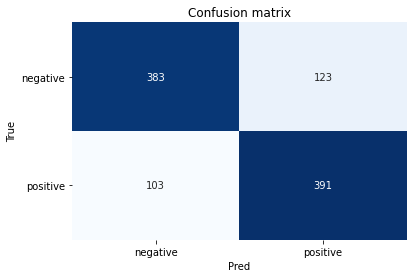

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

classes = np.unique(y_test)

cm = metrics.confusion_matrix(y_test, predicted)
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, 
            cbar=False)
ax.set(xlabel="Pred", ylabel="True", xticklabels=classes, 
       yticklabels=classes, title="Confusion matrix")
plt.yticks(rotation=0)


In [65]:
def printMostImportantFeatures(vectorizer, model, N):
    feature_names = vectorizer.get_feature_names()
    coefs_with_fns = sorted(zip(model.coef_[0], feature_names))
    topClass1 = coefs_with_fns[:N]
    topClass2 = coefs_with_fns[:-(N + 1):-1]
    print("Class 1 best: ")
    for feat in topClass1:
        print(feat)
    print("Class 2 best: ")
    for feat in topClass2:
        print(feat)

In [66]:
printMostImportantFeatures(bow_vector, model_1, 20)

Class 1 best: 
(-1.4487880784427287, 'bad')
(-1.138967912844326, 'waste')
(-1.0202630239490227, 'suppose')
(-0.9196184959288007, 'boring')
(-0.7752436098665176, 'lack')
(-0.7364428541287104, 'awful')
(-0.7300478394938404, 'dull')
(-0.717221147437373, 'least')
(-0.7132745403149127, 'part')
(-0.6307983835041662, 'horrible')
(-0.6257104478053092, 'terrible')
(-0.6193982672305437, 'only')
(-0.6101528138499239, 'poor')
(-0.6100174951746288, 'wrong')
(-0.6058397128178024, 'kind')
(-0.6011391173378573, 'disappointment')
(-0.5865442577360667, 'joke')
(-0.5603416356316075, 'person')
(-0.5594106266876574, 'late')
(-0.5450526685349874, 'base')
Class 2 best: 
(1.0192053800352303, 'perfect')
(1.000072100343569, 'great')
(0.7588192391846778, 'entertainment')
(0.736606202742966, 'enjoy')
(0.7076607634479779, 'believable')
(0.7062324320370196, 'laugh')
(0.6778049444135972, 'excellent')
(0.6463893626756453, 'notice')
(0.6174464904438952, 'amazing')
(0.588572538217537, 'awesome')
(0.5855759805515075, 'h

(0.0, 1.0)

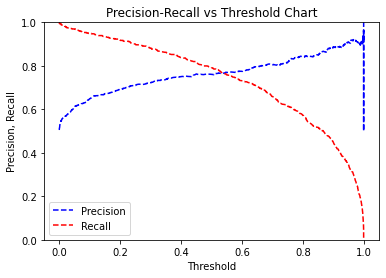

In [69]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, predicted_proba[:, 1], pos_label='positive') 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

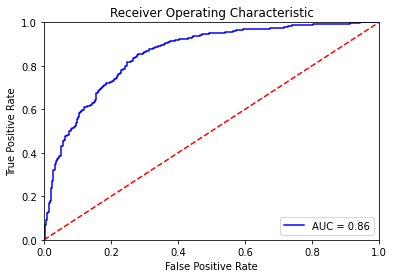

In [72]:
preds = predicted_proba[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds, pos_label='positive')
roc_auc = metrics.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- "True Positive Rate" = predicciones "positivas" correctas / total "positivas"

- "False Positive Rate" = predicciones "positivas" falsas / total "positivas" 

## 4. Enfoque 2: Transformar los textos en vectores con *bag-of-words* + *tf-idf*

### 4.1 Modelo Bag-of-words + tf-idf

TF-IDF (https://es.wikipedia.org/wiki/Tf-idf) busca mejorar el modelo *bag-of-words* **tomando en cuenta el nivel pragmático del lenguaje** --> *"Lo que es poco frecuente, es más importante/relevante"*

### 4.2 Implementación

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vector = TfidfVectorizer(tokenizer = feature_extraction, min_df=0., max_df=1.0)

In [ ]:
docs = ["You can catch more flies with honey than you can with vinegar.",
        "You can lead a horse to water, but you can't make him drink.",
       "You can do it.",
       "You can see a lot of stars tonight."]

In [ ]:
from pandas import DataFrame

X = tfidf_vector.fit_transform(docs)

print(DataFrame(X.A, columns=tfidf_vector.get_feature_names()).to_string())

### 4.3 Entrenamiento Regresión Logística

In [ ]:
from sklearn.model_selection import train_test_split

X = df['review'] 
ylabels = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.5)

In [ ]:
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression

model_2 = LogisticRegression()

pipe = Pipeline([('vectorizing', tfidf_vector),
                 ('learning', model_2)])

# model generation
pipe.fit(X_train,y_train)

### 4.4 Evaluación del modelo

In [ ]:
from sklearn import metrics

predicted = pipe.predict(X_test)

print(predicted)

In [ ]:
# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))

In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix)

from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))

In [ ]:
printMostImportantFeatures(tfidf_vector, model_2, 20)

## 5. Enfoque 3: Transformar los textos en vectores con *bag of words" + *word embedding*

In [ ]:
from pandas import DataFrame

X = bow_vector.fit_transform(X_train)

In [ ]:
X.shape

In [ ]:
print(X[1])

### 5.1 Word embedding

Word Embeddings (https://en.wikipedia.org/wiki/Word_embedding) busca mejorar el modelo *bag-of-words* **tomando en cuenta las relaciones semánticas entre las palabras**.

Por ejemplo:

**T1**. I want an apple

**T2**. I want an orange

**T3**. I want a car

Desde un punto de vista semántico, T1 y T2 deberían estar considerados más cercanos.

Eso requiere representar el sentido de las palabras más allá de su forma. Los *word embedding* proveen una solución a ese problema encapsulando el sentido de una palabra dentro de una representación vectorial.

El concepto de **word embedding** se refiere a un conjunto de técnicas utilizadas para aprender representaciones matemáticas, tipicamente vectores, de cada palabra.

Una de las técnicas más populares es __Word2Vec__ propuesto por un equipo de investigación de Google en 2013 (Efficient Estimation of Word Representations in Vector Space [Mikolov et al., 2013]).

Alternativas populares son __GloVe__ (propuesta por la Universidad de Stanford en 2014) y __FastText__ (propuesta por Facebook en 2016), que extende Word2Vec para considerar de mejor manera las palabras con errores ortográficas.

### 5.2 Algunos ejemplos

La librería Gensim viene con algunos modelos Word2Vec y GloVe pre-entrenados.

In [ ]:
from gensim.models import word2vec

In [ ]:
import gensim.downloader

print(list(gensim.downloader.info()['models'].keys()))

In [ ]:
word_vectors = gensim.downloader.load('glove-wiki-gigaword-100')

In [ ]:
word_vectors.most_similar('man', topn=20)

In [ ]:
word_vectors.most_similar('woman', topn=20)

In [ ]:
word_vectors.most_similar('chile', topn=20)

In [ ]:
word_vectors.wv.most_similar(positive=['woman','king'],negative=['man'],topn=5)

In [ ]:
word_vectors.wv.most_similar(positive=["conflict"])

In [ ]:
word_vectors.wv.most_similar(positive=["conflict","weapons"])

In [ ]:
word = "woman"
word_vectors[word].shape

In [ ]:
%matplotlib notebook

import matplotlib.pyplot as plt
from matplotlib import interactive
interactive(True)
from sklearn import manifold

plt.rcParams["figure.figsize"]=10,10

fig = plt.figure()## word embedding

tot_words = [word] + [tupla[0] for tupla in 
                 word_vectors.most_similar(word, topn=20)]

X = word_vectors[tot_words]## pca to reduce dimensionality from 300 to 3

pca = manifold.TSNE(perplexity=40, n_components=3, init='pca')

X = pca.fit_transform(X)## create dtf

dtf_ = pd.DataFrame(X, index=tot_words, columns=["x","y","z"])

dtf_["input"] = 0
dtf_["input"].iloc[0:1] = 1## plot 3d

from mpl_toolkits.mplot3d import Axes3D

ax = fig.add_subplot(111, projection='3d')
ax.scatter(dtf_[dtf_["input"]==0]['x'], 
           dtf_[dtf_["input"]==0]['y'], 
           dtf_[dtf_["input"]==0]['z'], c="black")
ax.scatter(dtf_[dtf_["input"]==1]['x'], 
           dtf_[dtf_["input"]==1]['y'], 
           dtf_[dtf_["input"]==1]['z'], c="red")
ax.set(xlabel=None, ylabel=None, zlabel=None, xticklabels=[], 
       yticklabels=[], zticklabels=[])
for label, row in dtf_[["x","y","z"]].iterrows():
    x, y, z = row
    ax.text(x, y, z, s=label)

In [ ]:
import numpy

def get_vect(word, model):
    try:
        return model.wv[word]
    except KeyError:
        return numpy.zeros((model.vector_size,))

def sum_vectors(phrase, model):
    return sum(get_vect(w, model) for w in phrase)

def word2vec_features(X, model):
    feats = numpy.vstack([sum_vectors(p, model) for p in X])
    return feats

wv_train_feat = word2vec_features(X_train, word_vectors)
wv_train_feat.shape

In [ ]:
model_3 = LogisticRegression(solver='lbfgs', max_iter=1000)
model_3.fit(wv_train_feat, y_train)

In [ ]:
wv_test_feat = word2vec_features(X_test, word_vectors)

In [ ]:
model_3.score(wv_test_feat, y_test)

In [ ]:
predicted = model_3.predict(wv_test_feat)

print(predicted)

In [ ]:
# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))

In [ ]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix

confusion_matrix = confusion_matrix(y_test, predicted)
print(confusion_matrix)

from sklearn.metrics import classification_report

print(classification_report(y_test, predicted))